In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
charging_set_complete = pd.read_csv("data/cleaned_charging_set.csv")

In [3]:
charging_set_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44856 entries, 0 to 44855
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  44856 non-null  object 
 1   connectionTime                      44856 non-null  object 
 2   disconnectTime                      44856 non-null  object 
 3   doneChargingTime                    44856 non-null  object 
 4   kWhDelivered                        44856 non-null  float64
 5   sessionID                           44856 non-null  object 
 6   siteID                              44856 non-null  int64  
 7   spaceID                             44856 non-null  object 
 8   stationID                           44856 non-null  object 
 9   userID                              44856 non-null  float64
 10  WhPerMile                           44856 non-null  float64
 11  kWhRequested                        44856

In [4]:
weather_set = pd.read_csv("data/cleaned_weather_set.csv")

In [5]:
charging_set_site1 = charging_set_complete[charging_set_complete["siteID"] == 1]
charging_set_site2 = charging_set_complete[charging_set_complete["siteID"] == 2]

In [6]:
#charging_set_site1 = charging_set_site1.drop(["paymentRequired_present","WhPerMile_present","kWhRequested_present","milesRequested_present","minutesAvailable_present","modifiedAt_present","requestedDeparture_present"],axis = 1)
#charging_set_site1 = charging_set_site1.drop(["userID", "id","timezone"], axis=1)
#charging_set_site2 = charging_set_site2.drop(["paymentRequired_present","WhPerMile_present","kWhRequested_present","milesRequested_present","minutesAvailable_present","modifiedAt_present","requestedDeparture_present"],axis = 1)
#charging_set_site2 = charging_set_site2.drop(["userID", "id","timezone"], axis=1)
df_no_duplicates = charging_set_site1.drop_duplicates()
charging_set_site1.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,...,requestedDeparture_time,requestedDeparture_weekday,connectionDuration,chargingDuration,connect_weekday,disconnect_weekday,chargingDone_disconnect_difference,connectionTime_date,Lockdown,Covid
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,...,20:51:54,3.0,6.039167,4.378056,3,3,1.661111,2020-01-02,0,0
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,...,23:31:50,3.0,9.025278,6.687500,3,3,2.337778,2020-01-02,0,0
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,...,14:56:35,3.0,10.713056,2.641944,3,4,8.071111,2020-01-02,0,0
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,...,15:04:58,3.0,2.644722,1.313056,3,3,1.331667,2020-01-02,0,0
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,...,22:24:01,3.0,8.144167,4.291389,3,3,3.852778,2020-01-02,0,0


In [7]:
amount_spaces1 = charging_set_site1["spaceID"].nunique()
amount_spaces2 = charging_set_site2["spaceID"].nunique()
print(amount_spaces1,amount_spaces2)

52 53


In [8]:
# Combine date and time columns into single datetime columns
#charging_set_site1['connectionTime'] = pd.to_datetime(charging_set_site1['connectionTime_date'] + ' ' + charging_set_site1['connectionTime_time'])
#charging_set_site1['disconnectTime'] = pd.to_datetime(charging_set_site1['disconnectTime_date'] + ' ' + charging_set_site1['disconnectTime_time'])
charging_set_site1["connectionTime"] = pd.to_datetime(charging_set_site1["connectionTime"])
charging_set_site1["disconnectTime"] = pd.to_datetime(charging_set_site1["disconnectTime"])
charging_set_site1 = charging_set_site1.sort_values(by='connectionTime').reset_index(drop=True)

min_time = charging_set_site1['connectionTime'].min().floor('H')
max_time = charging_set_site1['disconnectTime'].max().ceil('H')

hours_df = pd.DataFrame({'hour': pd.date_range(start=min_time, end=max_time, freq='H')})
hours_df.head()


C:\Users\adria\AppData\Local\Temp\ipykernel_18076\1611486237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_set_site1["connectionTime"] = pd.to_datetime(charging_set_site1["connectionTime"])
C:\Users\adria\AppData\Local\Temp\ipykernel_18076\1611486237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_set_site1["disconnectTime"] = pd.to_datetime(charging_set_site1["disconnectTime"])
C:\Users\adria\AppData\Local\Temp\ipykernel_18076\1611486237.py:8: FutureWarning: 'H' is deprecated an

,hour
0,2018-10-08 13:00:00+00:00
1,2018-10-08 14:00:00+00:00
2,2018-10-08 15:00:00+00:00
3,2018-10-08 16:00:00+00:00
4,2018-10-08 17:00:00+00:00


In [9]:
# Combine date and time columns into single datetime columns
#charging_set_site2['connectionTime'] = pd.to_datetime(charging_set_site2['connectionTime_date'] + ' ' + charging_set_site2['connectionTime_time'])
#charging_set_site2['disconnectTime'] = pd.to_datetime(charging_set_site2['disconnectTime_date'] + ' ' + charging_set_site2['disconnectTime_time'])
charging_set_site2["connectionTime"] = pd.to_datetime(charging_set_site2["connectionTime"])
charging_set_site2["disconnectTime"] = pd.to_datetime(charging_set_site2["disconnectTime"])
charging_set_site2 = charging_set_site2.sort_values(by='connectionTime').reset_index(drop=True)

min_time = charging_set_site2['connectionTime'].min().floor('H')
max_time = charging_set_site2['disconnectTime'].max().ceil('H')

hours_df2 = pd.DataFrame({'hour': pd.date_range(start=min_time, end=max_time, freq='H')})
hours_df2.head()


C:\Users\adria\AppData\Local\Temp\ipykernel_18076\3213071863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_set_site2["connectionTime"] = pd.to_datetime(charging_set_site2["connectionTime"])
C:\Users\adria\AppData\Local\Temp\ipykernel_18076\3213071863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_set_site2["disconnectTime"] = pd.to_datetime(charging_set_site2["disconnectTime"])
C:\Users\adria\AppData\Local\Temp\ipykernel_18076\3213071863.py:8: FutureWarning: 'H' is deprecated an

,hour
0,2018-04-30 15:00:00+00:00
1,2018-04-30 16:00:00+00:00
2,2018-04-30 17:00:00+00:00
3,2018-04-30 18:00:00+00:00
4,2018-04-30 19:00:00+00:00


In [10]:
charging_set_site1.duplicated().sum()


np.int64(1316)

In [11]:
charging_set_site1 = charging_set_site1.drop_duplicates()

In [12]:
charging_set_site1.duplicated().sum()

np.int64(0)

In [13]:
# Number of spaces (total available spaces site 1)
total_spaces = 52

# Function to calculate active session minutes for each hour
def calculate_utilization(hour, charging_set_site1, total_spaces):
    start_of_hour = hour
    end_of_hour = hour + pd.Timedelta(hours=1)
    
    # Filter sessions active during this hour
    active_sessions = charging_set_site1[
        (charging_set_site1['connectionTime'] < end_of_hour) & (charging_set_site1['disconnectTime'] > start_of_hour)
    ]
    
    # Calculate active minutes for each session
    active_minutes = 0
    for _, session in active_sessions.iterrows():
        session_start = max(session['connectionTime'], start_of_hour)
        session_end = min(session['disconnectTime'], end_of_hour)
        active_minutes += (session_end - session_start).total_seconds() / 60  # Convert to minutes
    
    # count number of cars
    connected_cars = len(active_sessions)
    # Utilization as a percentage
    possible_minutes = total_spaces * 60  # 60 minutes per hour per space
    utilization = active_minutes / possible_minutes if possible_minutes > 0 else 0
    return utilization, connected_cars


# Compute utilization column
hours_df['utilization'] = hours_df['hour'].apply(
    lambda h: calculate_utilization(h, charging_set_site1, total_spaces)[0]
)

# Compute connectedCars column
hours_df['connectedCars'] = hours_df['hour'].apply(
    lambda h: calculate_utilization(h, charging_set_site1, total_spaces)[1]
)

# Display results
hours_df.head()


,hour,utilization,connectedCars
0,2018-10-08 13:00:00+00:00,0.019573,3
1,2018-10-08 14:00:00+00:00,0.166293,15
2,2018-10-08 15:00:00+00:00,0.288462,15
3,2018-10-08 16:00:00+00:00,0.288462,15
4,2018-10-08 17:00:00+00:00,0.288462,15


In [14]:
lockdown_start = pd.Timestamp("2020-03-20", tz="UTC")
lockdown_end = pd.Timestamp("2020-06-30", tz="UTC")
covid_start = pd.Timestamp("2020-01-21", tz="UTC")

# Lockdown-Spalte: 1, wenn das Datum zwischen 20. März 2020 und 30. Juni 2020 liegt
hours_df["Lockdown"] = hours_df["hour"].apply(
    lambda date: 1 if lockdown_start <= date <= lockdown_end else 0
)

# Covid-Spalte: 1, wenn das Datum nach dem 21. Januar 2020 liegt
hours_df["Covid"] = hours_df["hour"].apply(
    lambda date: 1 if date > covid_start else 0
)

In [15]:
charging_set_site1.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,...,requestedDeparture_time,requestedDeparture_weekday,connectionDuration,chargingDuration,connect_weekday,disconnect_weekday,chargingDone_disconnect_difference,connectionTime_date,Lockdown,Covid
0,5c36631ef9af8b4639a8e588,2018-10-08 13:24:48+00:00,2018-10-09 00:05:33+00:00,2018-10-09 00:00:02+00:00,6.314,1_1_193_816_2018-10-08 13:24:47.751438,1,AG-1F05,1-1-193-816,365.0,...,14:24:48,0.0,10.679167,10.587222,0,1,0.091944,2018-10-08,0,0
1,5c36631ef9af8b4639a8e58b,2018-10-08 13:34:52+00:00,2018-10-09 00:43:48+00:00,2018-10-09 00:00:03+00:00,22.845,1_1_179_810_2018-10-08 13:34:52.479296,1,AG-3F30,1-1-179-810,416.0,...,23:29:52,0.0,11.148889,10.419722,0,1,0.729167,2018-10-08,0,0
2,5c36631ef9af8b4639a8e593,2018-10-08 13:59:16+00:00,2018-10-09 00:28:04+00:00,2018-10-09 00:00:01+00:00,25.382,1_1_179_777_2018-10-08 13:59:15.937669,1,AG-3F28,1-1-179-777,507.0,...,23:30:16,0.0,10.480000,10.012500,0,1,0.467500,2018-10-08,0,0
3,5c36631ef9af8b4639a8e596,2018-10-08 14:06:38+00:00,2018-10-09 00:13:03+00:00,2018-10-09 00:00:03+00:00,7.534,1_1_179_791_2018-10-08 14:06:38.326990,1,AG-3F26,1-1-179-791,463.0,...,21:30:38,0.0,10.106944,9.890278,0,1,0.216667,2018-10-08,0,0
4,5c36631ef9af8b4639a8e597,2018-10-08 14:07:27+00:00,2018-10-09 00:22:00+00:00,2018-10-09 00:00:03+00:00,20.679,1_1_179_799_2018-10-08 14:07:26.816809,1,AG-3F25,1-1-179-799,581.0,...,16:55:27,0.0,10.242500,9.876667,0,1,0.365833,2018-10-08,0,0


In [16]:
hours_df.describe()

,utilization,connectedCars,Lockdown,Covid
count,25731.000000,25731.000000,25731.000000,25731.000000
mean,0.153992,9.173099,0.095177,0.562085
std,0.283637,16.019541,0.293465,0.496140
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.019231,1.000000,0.000000,1.000000
75%,0.140804,9.000000,0.000000,1.000000
max,1.000000,60.000000,1.000000,1.000000


In [17]:
# transform column to the same format
hours_df["hour"] = hours_df["hour"].dt.tz_localize(None)

# Convert the "timestamp" column in the weather data to datetime
weather_set["timestamp"] = pd.to_datetime(weather_set["timestamp"])

# Round the weather data timestamps to the nearest hour
weather_set["timestamp"] = weather_set["timestamp"].dt.floor("H")

# Merge the datasets based on the "timestamp" column
merged_data = pd.merge(hours_df, weather_set, left_on="hour", right_on="timestamp", how="left")

# Drop the redundant "timestamp" column from the weather data after merging
merged_data = merged_data.drop(columns=["timestamp"])

C:\Users\adria\AppData\Local\Temp\ipykernel_18076\2673528743.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_set["timestamp"] = weather_set["timestamp"].dt.floor("H")


----

In [18]:
start_date = pd.Timestamp("2020-08-02")
end_date = pd.Timestamp("2020-10-31")

# Filterung der Einträge im Zeitraum von August 2020 bis Dezember 2020
filtered_data= hours_df[(hours_df['hour'] >= start_date) & (hours_df['hour'] <= end_date)]
filtered_data = pd.DataFrame(filtered_data)

#filtered_data.describe()
print(len(filtered_data[filtered_data["utilization"] > 0]))
# Gefilterte Daten anzeigen


23


In [19]:
print(len(filtered_data['utilization'].unique()))

18


In [20]:
merged_data = merged_data[~((merged_data['hour'] >= start_date) & (merged_data['hour'] <= end_date))]

Site 1 Dates

In [21]:
start_date = pd.Timestamp("2018-10-01")
end_date = pd.Timestamp("2021-01-01")

In [22]:
merged_data = merged_data[((merged_data['hour'] >= start_date) & (merged_data['hour'] <= end_date))]

____

In [23]:
merged_data.head()

,hour,utilization,connectedCars,Lockdown,Covid,city,temperature,cloud_cover,cloud_cover_description,pressure,...,haze,partly,rain,light_rain_thunder,light,t-storm,thunder,thunder_in_vicinity,cloudy,smoke
0,2018-10-08 13:00:00,0.019573,3,0,0,Burbank,13.0,34.0,Fair,982.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-10-08 14:00:00,0.166293,15,0,0,Burbank,14.0,28.0,Mostly Cloudy,982.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2018-10-08 14:00:00,0.166293,15,0,0,Burbank,14.0,30.0,Partly Cloudy,982.86,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2018-10-08 14:00:00,0.166293,15,0,0,Burbank,15.0,30.0,Partly Cloudy,982.86,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2018-10-08 15:00:00,0.288462,15,0,0,Burbank,17.0,30.0,Partly Cloudy,983.19,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
merged_data.isna().sum()

hour                         0
utilization                  0
connectedCars                0
Lockdown                     0
Covid                        0
city                        72
temperature                 88
cloud_cover                 87
cloud_cover_description     87
pressure                    72
windspeed                  130
precipitation               72
felt_temperature            89
temperature_difference      89
date_year                   72
date_month                  72
date_day                    72
time                        72
mostly                      72
heavy                       72
fog                         72
windy                       72
blowing_dust                72
fair                        72
haze                        72
partly                      72
rain                        72
light_rain_thunder          72
light                       72
t-storm                     72
thunder                     72
thunder_in_vicinity         72
cloudy  

In [25]:
merged_data = merged_data.dropna(axis=0)
merged_data.isna().sum()

hour                       0
utilization                0
connectedCars              0
Lockdown                   0
Covid                      0
city                       0
temperature                0
cloud_cover                0
cloud_cover_description    0
pressure                   0
windspeed                  0
precipitation              0
felt_temperature           0
temperature_difference     0
date_year                  0
date_month                 0
date_day                   0
time                       0
mostly                     0
heavy                      0
fog                        0
windy                      0
blowing_dust               0
fair                       0
haze                       0
partly                     0
rain                       0
light_rain_thunder         0
light                      0
t-storm                    0
thunder                    0
thunder_in_vicinity        0
cloudy                     0
smoke                      0
dtype: int64

In [26]:
merged_data.duplicated().sum()

np.int64(0)

In [27]:
# create season column and weekend/weekday column

# Function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10,11]:
        return "Fall"
    return np.nan

# Apply the season mapping
merged_data["Season"] = merged_data["date_month"].apply(get_season)

# Add weekday/weekend column 
merged_data["Weekday/Weekend"] = merged_data["date_day"].apply(lambda x: "Weekend" if x in [5, 6] else "Weekday")

# Mapping seasons to numeric values
season_mapping = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}
merged_data["Season"] = merged_data["Season"].map(season_mapping)

# Mapping weekday/weekend to numeric values
weekday_weekend_mapping = {"Weekday": 0, "Weekend": 1}
merged_data["Weekday/Weekend"] = merged_data["Weekday/Weekend"].map(weekday_weekend_mapping)

# create df column for time of day
def assign_category(hour):
    if hour >= 23 or hour < 6:
        return 0  # Night
    elif 6 <= hour < 12:
        return 1  # Morning
    elif 12 <= hour < 18:
        return 2  # Afternoon
    else:
        return 3  # Evening

# Apply the function to create a new column
merged_data["time_of_day"] = merged_data["hour"].dt.hour.apply(assign_category)

# Resulting DataFrame
merged_data.head()


,hour,utilization,connectedCars,Lockdown,Covid,city,temperature,cloud_cover,cloud_cover_description,pressure,...,light_rain_thunder,light,t-storm,thunder,thunder_in_vicinity,cloudy,smoke,Season,Weekday/Weekend,time_of_day
0,2018-10-08 13:00:00,0.019573,3,0,0,Burbank,13.0,34.0,Fair,982.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,2
1,2018-10-08 14:00:00,0.166293,15,0,0,Burbank,14.0,28.0,Mostly Cloudy,982.86,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0,2
2,2018-10-08 14:00:00,0.166293,15,0,0,Burbank,14.0,30.0,Partly Cloudy,982.86,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0,2
3,2018-10-08 14:00:00,0.166293,15,0,0,Burbank,15.0,30.0,Partly Cloudy,982.86,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0,2
4,2018-10-08 15:00:00,0.288462,15,0,0,Burbank,17.0,30.0,Partly Cloudy,983.19,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0,2


In [28]:
# create hour of day column
merged_data["hour_of_day"] = merged_data["hour"].dt.hour

In [29]:
merged_data.describe()

,hour,utilization,connectedCars,Lockdown,Covid,temperature,cloud_cover,pressure,windspeed,precipitation,...,light,t-storm,thunder,thunder_in_vicinity,cloudy,smoke,Season,Weekday/Weekend,time_of_day,hour_of_day
count,19473,19473.000000,19473.000000,19473.000000,19473.000000,19473.000000,19473.000000,19473.000000,19473.000000,19473.000000,...,19473.000000,19473.000000,19473.000000,19473.0,19473.000000,19473.000000,19473.000000,19473.000000,19473.000000,19473.000000
mean,2019-10-08 03:06:09.372977664,0.191415,11.348739,0.141735,0.346274,16.783290,29.903405,987.195051,8.484517,0.075825,...,0.037693,0.001027,0.000822,0.0,0.335285,0.004108,1.380578,0.065681,1.388487,11.547527
min,2018-10-08 13:00:00,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,971.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-03-31 02:00:00,0.000000,0.000000,0.000000,0.000000,12.000000,26.000000,984.500000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,2019-09-28 20:00:00,0.019231,1.000000,0.000000,0.000000,16.000000,33.000000,986.810000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,12.000000
75%,2020-03-30 03:00:00,0.193162,13.000000,0.000000,1.000000,21.000000,34.000000,989.770000,13.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,2.000000,0.000000,2.000000,17.000000
max,2021-01-01 00:00:00,1.000000,60.000000,1.000000,1.000000,38.000000,47.000000,999.650000,57.000000,18.540000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,3.000000,1.000000,3.000000,23.000000
std,NaN,0.325869,18.290906,0.348787,0.475794,6.116187,5.669103,3.738898,6.841105,0.540408,...,0.190458,0.032032,0.028653,0.0,0.472102,0.063965,1.137039,0.247729,1.095063,6.801756


In [30]:
# drop unnecessary columns
merged_data = merged_data.drop(["time","city","hour","cloud_cover_description"], axis = 1)

In [31]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19473 entries, 0 to 21933
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   utilization             19473 non-null  float64
 1   connectedCars           19473 non-null  int64  
 2   Lockdown                19473 non-null  int64  
 3   Covid                   19473 non-null  int64  
 4   temperature             19473 non-null  float64
 5   cloud_cover             19473 non-null  float64
 6   pressure                19473 non-null  float64
 7   windspeed               19473 non-null  float64
 8   precipitation           19473 non-null  float64
 9   felt_temperature        19473 non-null  float64
 10  temperature_difference  19473 non-null  float64
 11  date_year               19473 non-null  float64
 12  date_month              19473 non-null  float64
 13  date_day                19473 non-null  float64
 14  mostly                  19473 non-null  flo

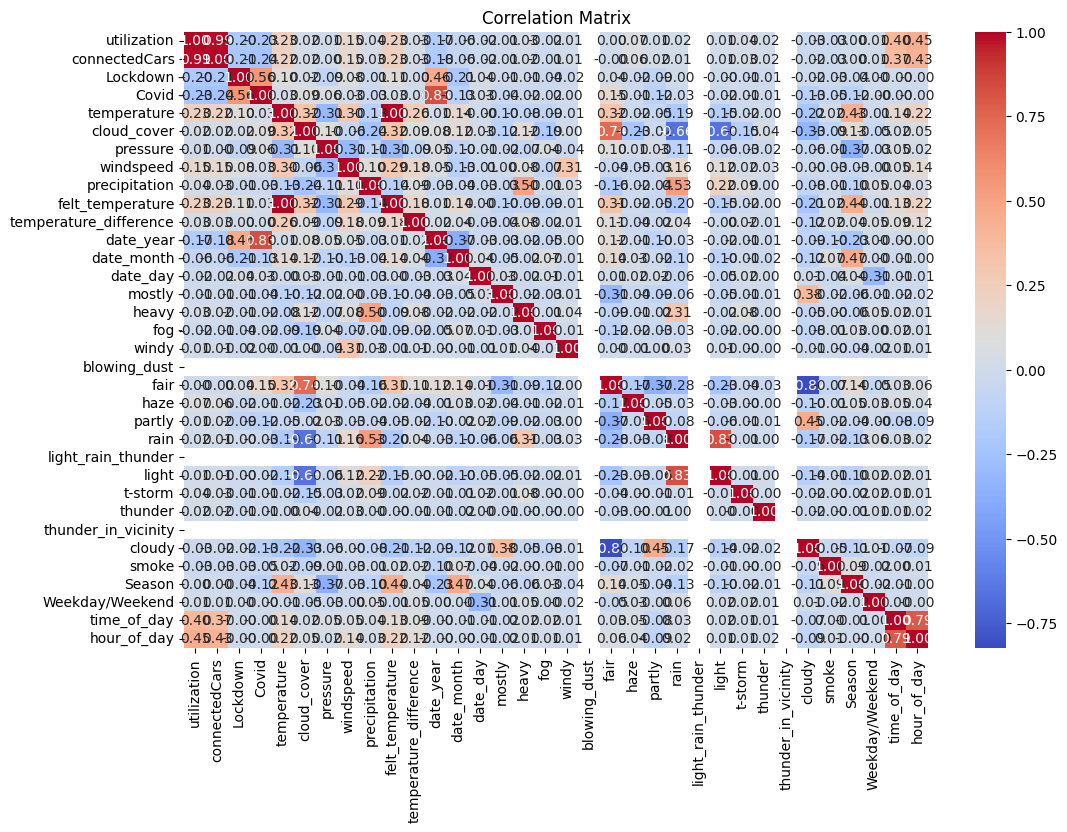

Correlation with connectedCars:
connectedCars             1.000000
utilization               0.990631
hour_of_day               0.425902
time_of_day               0.370949
felt_temperature          0.225063
temperature               0.223451
windspeed                 0.149480
haze                      0.064559
t-storm                   0.034362
precipitation             0.034022
temperature_difference    0.033252
partly                    0.024324
heavy                     0.023531
cloud_cover               0.021448
thunder                   0.019247
rain                      0.014981
light                     0.010968
windy                     0.010746
Weekday/Weekend           0.010517
Season                    0.003535
pressure                  0.000646
fair                     -0.004723
mostly                   -0.007469
fog                      -0.012604
date_day                 -0.015571
cloudy                   -0.019554
smoke                    -0.027166
date_month             

In [32]:

# Compute correlation matrix
correlation_matrix = merged_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Correlation with target feature
target_correlation = correlation_matrix['connectedCars'].sort_values(ascending=False)
print("Correlation with connectedCars:")
print(target_correlation)


In [33]:
merged_data = merged_data.drop_duplicates()

X = merged_data[["temperature","time_of_day","Season","windspeed","hour_of_day","date_month", "Covid", "Lockdown"]]
y = merged_data[["connectedCars"]]

In [34]:
y.head()

,connectedCars
0,3
1,15
2,15
3,15
4,15


In [35]:
y.describe()

,connectedCars
count,19210.000000
mean,11.364654
std,18.294057
min,0.000000
25%,0.000000
50%,1.000000
75%,13.000000
max,60.000000


In [36]:
#X = X.drop(["precipitation","haze"], axis= 1)
#X = X.drop(["haze","smoke"], axis= 1)

X.head()

,temperature,time_of_day,Season,windspeed,hour_of_day,date_month,Covid,Lockdown
0,13.0,2,3,0.0,13,10.0,0,0
1,14.0,2,3,0.0,14,10.0,0,0
2,14.0,2,3,0.0,14,10.0,0,0
3,15.0,2,3,0.0,14,10.0,0,0
4,17.0,2,3,0.0,15,10.0,0,0


In [37]:
X.var()

temperature    37.634932
time_of_day     1.205828
Season          1.293297
windspeed      46.979048
hour_of_day    46.555134
date_month     13.656749
Covid           0.226605
Lockdown        0.122184
dtype: float64

In [38]:
X.describe()

,temperature,time_of_day,Season,windspeed,hour_of_day,date_month,Covid,Lockdown
count,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000
mean,16.826601,1.387819,1.381104,8.510099,11.548360,6.648568,0.347007,0.142478
std,6.134732,1.098102,1.137232,6.854126,6.823132,3.695504,0.476030,0.349549
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,6.000000,6.000000,3.000000,0.000000,0.000000
50%,16.000000,1.000000,1.000000,7.000000,12.000000,6.000000,0.000000,0.000000
75%,21.000000,2.000000,2.000000,13.000000,17.000000,10.000000,1.000000,0.000000
max,38.000000,3.000000,3.000000,57.000000,23.000000,12.000000,1.000000,1.000000


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19210 entries, 0 to 21933
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  19210 non-null  float64
 1   time_of_day  19210 non-null  int64  
 2   Season       19210 non-null  int64  
 3   windspeed    19210 non-null  float64
 4   hour_of_day  19210 non-null  int32  
 5   date_month   19210 non-null  float64
 6   Covid        19210 non-null  int64  
 7   Lockdown     19210 non-null  int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 1.2 MB


In [40]:
X.isna().sum()


temperature    0
time_of_day    0
Season         0
windspeed      0
hour_of_day    0
date_month     0
Covid          0
Lockdown       0
dtype: int64

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras_tuner import HyperModel, RandomSearch
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score


# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# initialise model
model = Sequential(
    [Dense(160, activation="relu", input_shape=[X_train.shape[1]]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
     Dense(32, activation="relu"),
      Dense(32, activation="relu"),
       Dense(32, activation="relu"),
       Dense(32, activation="relu"),
       Dense(32, activation="relu"),
     Dense(1)])

c:\Users\adria\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# compile model
model.compile(optimizer="adam", loss = "mean_squared_error",
             metrics=["mae"])

In [44]:
# train model
epochs = 50

history = model.fit(X_train, y_train.values,
                   epochs=epochs, validation_split=0.3)

Epoch 1/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 308.5212 - mae: 11.1694 - val_loss: 190.9640 - val_mae: 9.2431
Epoch 2/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 193.0422 - mae: 9.2529 - val_loss: 183.1324 - val_mae: 8.5970
Epoch 3/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 181.0298 - mae: 8.6721 - val_loss: 172.7816 - val_mae: 8.5284
Epoch 4/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 179.1021 - mae: 8.6366 - val_loss: 171.8620 - val_mae: 8.3955
Epoch 5/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 173.7455 - mae: 8.4475 - val_loss: 176.7128 - val_mae: 8.3864
Epoch 6/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 175.2186 - mae: 8.4467 - val_loss: 167.6306 - val_mae: 8.4018
Epoch 7/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 171.6956 - mae: 8.3473 - val_loss: 165.3024 - val_mae: 8.3959
Epoch 8/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 170.1931 - mae: 8.2225 - val_loss: 165.2555 - val_mae: 8.3436
Epoch 9/50
337/337 ━

In [45]:
# Make predictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [46]:
print(r2)

0.52763831615448


In [47]:
# Evaluating the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 149.4103 - mae: 7.6097
Test Loss: 158.2261199951172, Test MAE: 7.876370429992676
